# Linear Regression Assignment (Geely Auto)


## 1. Importing the data and performing data clean-up
#### Initializing the libraries and importing the data

In [1]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [2]:
#To display all colmuns
pd.set_option('display.max.column',70)

In [3]:
# Importing the data from the CSV file

CarPrice_data = pd.read_csv('CarPrice_Assignment.csv')
CarPrice_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- ### Inspect Null values

In [4]:
# Missing value check for Columns.
missingColValue = CarPrice_data.isnull().sum() / CarPrice_data.index.size * 100
print('100 % Missing Column Data Count : ', missingColValue[missingColValue == 100].size)
print('More than 20 % Missing Column Data Count : ', missingColValue[missingColValue >= 20].size)

100 % Missing Column Data Count :  0
More than 20 % Missing Column Data Count :  0


In [5]:
CarPrice_data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
#Spliting the column name Car Name in to Car_Company and Car_Model

# new data frame with split value columns 
temp = CarPrice_data["CarName"].str.split(" ", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
CarPrice_data["Car_Company"]= temp[0] 
  
# making seperate last name column from new data frame 
CarPrice_data["Car_Model"]= temp[1] 
  
# Dropping old Name columns 
CarPrice_data.drop(columns =["CarName"], inplace = True) 
  
# CarPrice_Data display 
CarPrice_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Company,Car_Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [7]:
CarPrice_data.Car_Company.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
mercury         1
vokswagen       1
toyouta         1
Nissan          1
porcshce        1
Name: Car_Company, dtype: int64

**The name of car company is has different cases: Need to make the case consistent**

In [8]:
CarPrice_data['Car_Company'] = CarPrice_data['Car_Company'].str.lower()

In [9]:
CarPrice_data.Car_Company.value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
renault         2
maxda           2
mercury         1
vokswagen       1
toyouta         1
porcshce        1
Name: Car_Company, dtype: int64

**Then name for the Car_Company for (vw, vokswagen, porcshce and toyouta) are wrong. Need to replace with spelling which is present in the data**

In [10]:
CarPrice_data['Car_Company'] = CarPrice_data['Car_Company'].replace(['vw','vokswagen'],'volkswagen')
CarPrice_data['Car_Company'] = CarPrice_data['Car_Company'].replace(['porcshce'],'porsche')
CarPrice_data['Car_Company'] = CarPrice_data['Car_Company'].replace(['toyouta'],'toyota')

In [11]:
CarPrice_data.Car_Company.value_counts()

toyota         32
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
maxda           2
mercury         1
Name: Car_Company, dtype: int64

**Checking the shape of the Data**

In [12]:
CarPrice_data.shape

(205, 27)

In [13]:
CarPrice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [14]:
CarPrice_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 2. Visualization the data:

- To check for multicollinearity going on between any variables

Plots are drawn using `matplotlib` and `seaborn`.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

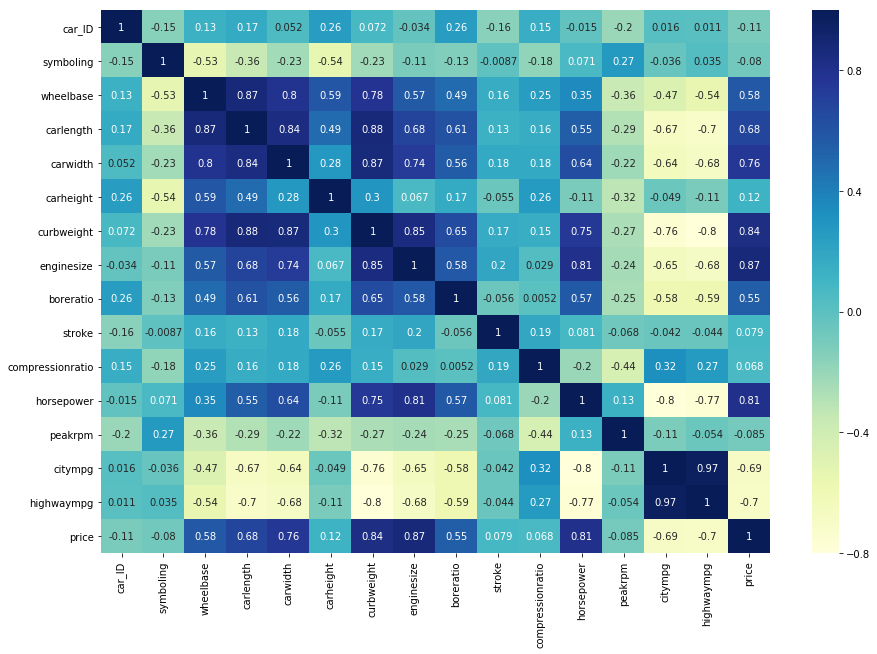

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(CarPrice_data.corr(),cmap='YlGnBu',annot=True,ax=ax)
plt.show()

C:\Users\Blessing\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


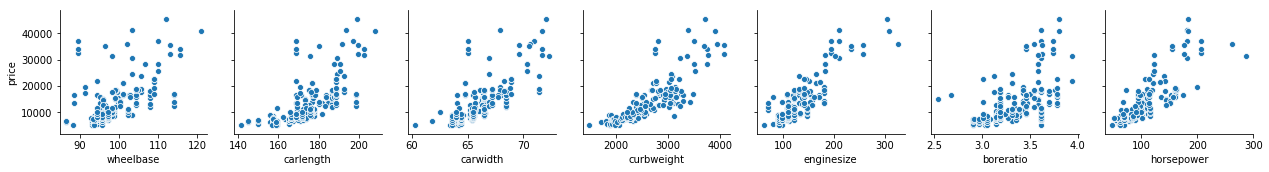

In [17]:
#Creating a Pair Plot to see the correlation

sns.pairplot(CarPrice_data, x_vars=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower'], y_vars='price', size=2.5, aspect=1, kind='scatter')
plt.show()

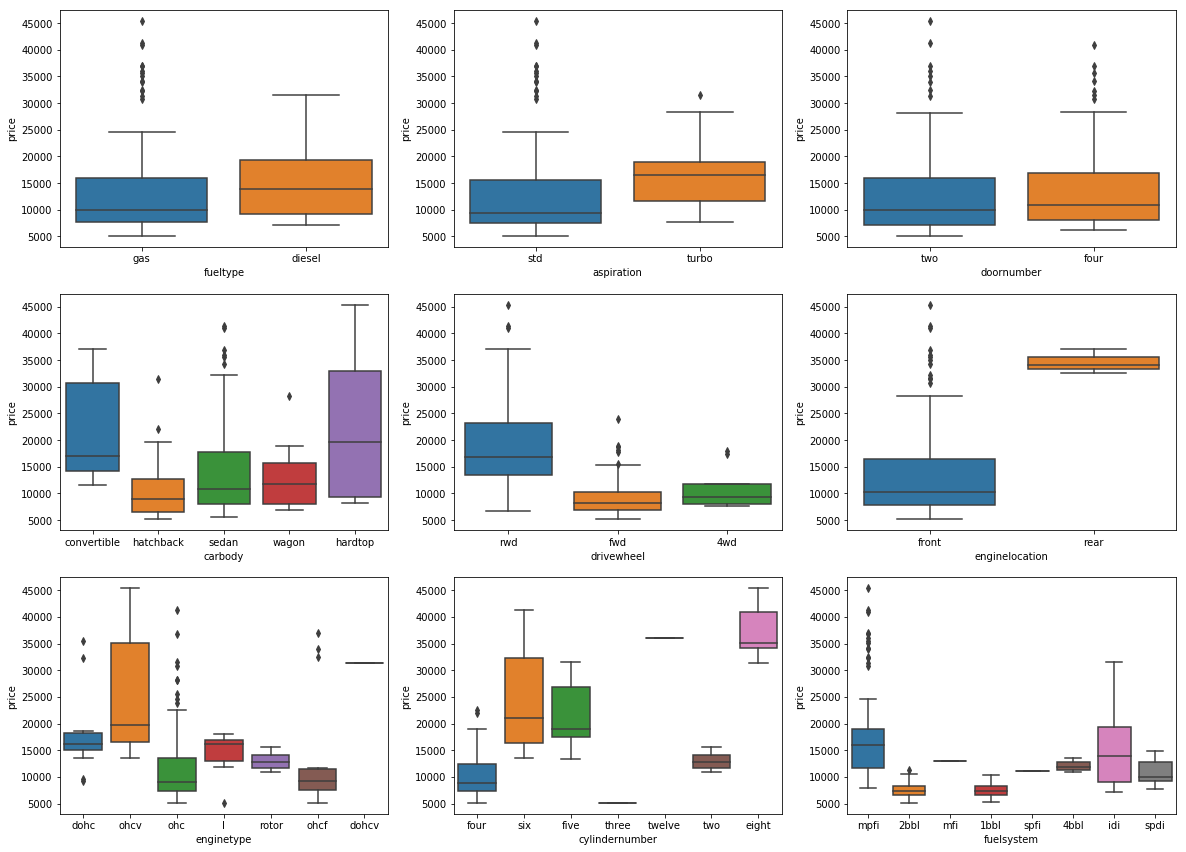

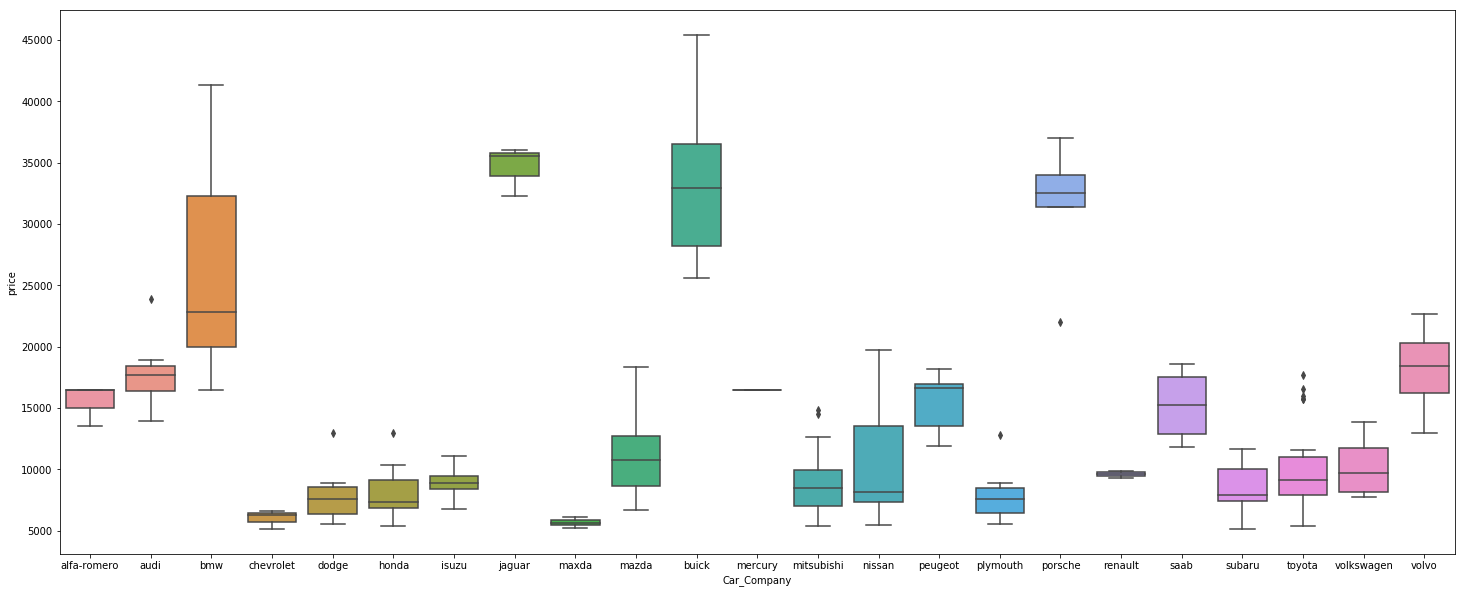

In [18]:
#Plooting the categorical data
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice_data)
plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice_data)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice_data)
plt.subplot(4,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice_data)
plt.subplot(4,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice_data)
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice_data)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice_data)
plt.subplot(4,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice_data)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice_data)
plt.show()
plt.figure(figsize=(25, 10))
sns.boxplot(x = 'Car_Company', y = 'price', data = CarPrice_data)
plt.show()

## 3. Data Preperation:

- Creating dummy variables: 9 Categorical variable have been further broken down to each value type as individual column


In [19]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
fueltype = pd.get_dummies(CarPrice_data['fueltype'],drop_first = True)
aspiration = pd.get_dummies(CarPrice_data['aspiration'],drop_first = True)
doornumber = pd.get_dummies(CarPrice_data['doornumber'],drop_first = True)
carbody = pd.get_dummies(CarPrice_data['carbody'],drop_first = True)
drivewheel = pd.get_dummies(CarPrice_data['drivewheel'],drop_first = True)
enginelocation = pd.get_dummies(CarPrice_data['enginelocation'],drop_first = True)
enginetype = pd.get_dummies(CarPrice_data['enginetype'],drop_first = True)
cylindernumber = pd.get_dummies(CarPrice_data['cylindernumber'],drop_first = True)
fuelsystem = pd.get_dummies(CarPrice_data['fuelsystem'],drop_first = True)
#Car_Company = pd.get_dummies(CarPrice_data['Car_Company'])

In [20]:
print("Fuel Type")
display(fueltype.head())
print("Aspiration")
display(aspiration.head())
print("Number of Doors")
display(doornumber.head())
print("Type of Carbody")
display(carbody.head())
print("Type of Drive")
display(drivewheel.head())
print("Location of Engine")
display(enginelocation.head())
print("Type of Engine")
display(enginetype.head())
print("Number of Cylinder")
display(cylindernumber.head())
print("Type of Fuel System")
display(fuelsystem.head())

Fuel Type


,gas
0,1
1,1
2,1
3,1
4,1


Aspiration


,turbo
0,0
1,0
2,0
3,0
4,0


Number of Doors


,two
0,1
1,1
2,1
3,0
4,0


Type of Carbody


,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


Type of Drive


,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


Location of Engine


,rear
0,0
1,0
2,0
3,0
4,0


Type of Engine


,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


Number of Cylinder


,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


Type of Fuel System


,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [21]:
# Adding dummy variables to the main data set

CarPrice_data = pd.concat([CarPrice_data, fueltype, aspiration, doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem], axis = 1)

In [22]:
#Checking the dimensions of the dataset
CarPrice_data.shape

(205, 56)

In [23]:
CarPrice_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.902439,0.180488,0.439024,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.014634,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.297446,0.385535,0.497483,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.120377,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
columns = ['car_ID','fueltype', 'aspiration', 'doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','mfi','spfi']
CarPrice_data.drop(columns, axis=1, inplace=True)

In [25]:
CarPrice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
Car_Company         205 non-null object
Car_Model           203 non-null object
gas                 205 non-null uint8
turbo               205 non-null uint8
two                 205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan              

#### Converting the Unit 8 varaibles to int

In [26]:
Car_Feat = CarPrice_data.select_dtypes(include=['uint8']).astype('int64')

In [27]:
CarPrice_data.drop(CarPrice_data.select_dtypes(include=['uint8']), axis=1, inplace=True)

In [28]:
CarPrice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
Car_Company         205 non-null object
Car_Model           203 non-null object
dtypes: float64(8), int64(7), object(2)
memory usage: 27.3+ KB


In [29]:
CarPrice_data = pd.concat([CarPrice_data, Car_Feat], axis = 1)

In [30]:
CarPrice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
Car_Company         205 non-null object
Car_Model           203 non-null object
gas                 205 non-null int64
turbo               205 non-null int64
two                 205 non-null int64
hardtop             205 non-null int64
hatchback           205 non-null int64
sedan              

In [31]:
col_drop = ['Car_Company','Car_Model']
CarPrice_data.drop(col_drop, axis=1, inplace=True)

## 4. Spliting the Dataset in to Training and Test:

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice_data, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features:   (Min-Max Scaling)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mpfi,spdi
122,0.6,0.244828,167.3,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,7609.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.0,0.272414,168.9,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,22018.0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
166,0.6,0.272414,168.7,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,9538.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1.0,0.068966,168.8,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
199,0.2,0.610345,188.8,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,18950.0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [36]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mpfi,spdi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,173.416783,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,13056.347322,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958
std,0.239200,0.205581,12.598122,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,7807.036883,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198
min,0.000000,0.000000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,165.650000,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,7554.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,172.000000,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,10198.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.503448,182.300000,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,16465.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,202.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mpfi,spdi
symboling,1.000000,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.182393,-0.132768,-0.028788,-0.266962,0.038395,0.343449,-0.042737,0.022248,-0.129859,0.272756,-0.102342,0.659214,0.188676,0.431934,-0.378439,-0.279121,0.122342,-0.072106,0.155104,0.014279,-0.125030,-0.064765,-0.054312,-0.028385,0.313538,-0.100869,-0.020144,-0.071684,0.084692,-0.056133,0.313538,0.001721,0.270560,-0.272756,0.020993,0.211203
wheelbase,-0.539877,1.000000,0.877909,0.796888,0.555524,0.792815,0.588600,0.482386,0.224970,0.341651,0.382758,-0.347757,-0.476317,-0.542295,0.622591,-0.393481,0.277414,-0.462232,-0.103235,-0.371606,0.333352,0.162160,-0.499023,0.538721,-0.127454,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,0.288842,-0.367809,0.283534,-0.142992,0.049113,-0.092032,-0.438523,-0.079417,0.393481,0.338923,-0.117645
carlength,-0.390880,0.877909,1.000000,0.846307,0.454721,0.881495,0.702794,0.620436,0.176814,0.227958,0.564588,-0.301036,-0.674112,-0.704482,0.713749,-0.275886,0.234925,-0.436645,-0.049558,-0.456829,0.333683,0.195750,-0.549343,0.567900,-0.030193,0.015262,0.253571,-0.293690,-0.086593,0.211595,-0.059682,0.278343,-0.438027,0.355099,-0.216024,0.122216,-0.059682,-0.502693,-0.051502,0.275886,0.501706,-0.094743
carwidth,-0.263917,0.796888,0.846307,1.000000,0.245022,0.873884,0.754925,0.580962,0.233631,0.249516,0.685051,-0.188153,-0.652871,-0.680451,0.799380,-0.293054,0.307027,-0.245854,-0.068989,-0.224067,0.222689,0.019073,-0.500816,0.539726,-0.031943,0.245699,0.193688,-0.290778,-0.108346,0.305924,-0.010753,0.392058,-0.540779,0.271178,-0.210698,0.181043,-0.010753,-0.551596,-0.009279,0.293054,0.460851,-0.063850
carheight,-0.557179,0.555524,0.454721,0.245022,1.000000,0.272388,0.045042,0.160835,0.003588,0.289830,-0.151952,-0.358919,-0.006993,-0.073803,0.096631,-0.320231,0.111052,-0.554436,-0.075554,-0.489903,0.247586,0.439328,-0.119790,0.035752,-0.067534,-0.105596,0.334046,0.075929,-0.017898,-0.099329,-0.276412,0.185630,0.058694,0.001842,-0.012171,-0.199022,-0.276412,-0.067042,-0.238523,0.320231,0.047857,-0.263335
curbweight,-0.268481,0.792815,0.881495,0.873884,0.272388,1.000000,0.865102,0.625759,0.209277,0.231862,0.759759,-0.278156,-0.743870,-0.780075,0.861860,-0.288561,0.325634,-0.251023,-0.015781,-0.294072,0.162677,0.145206,-0.691805,0.687311,0.033473,0.127791,0.237870,-0.412737,-0.100522,0.370775,-0.040089,0.273471,-0.593859,0.455979,-0.162583,0.218088,-0.040089,-0.593771,-0.042573,0.288561,0.526508,-0.027766
enginesize,-0.182393,0.588600,0.702794,0.754925,0.045042,0.865102,1.000000,0.545157,0.228768,0.119246,0.817916,-0.265202,-0.627421,-0.646354,0.867915,-0.145095,0.115050,-0.081539,0.074244,-0.232742,0.196117,-0.046523,-0.524765,0.582234,0.141901,0.160398,0.027066,-0.337783,-0.079374,0.506634,-0.217946,0.162473,-0.613032,0.561996,-0.131452,0.413197,-0.217946,-0.475134,-0.197035,0.145095,0.509074,-0.018578
boreratio,-0.132768,0.482386,0.620436,0.580962,0.160835,0.625759,0.545157,1.000000,-0.152836,0.116317,0.518307,-0.287938,-0.540514,-0.534084,0.533591,-0.153727,0.186639,-0.183979,0.110272,-0.244359,0.117691,0.093406,-0.517488,0.507992,0.139578,0.204110,0.214048,-0.473985,0.375397,0.074544,0.014733,-0.000743,-0.138491,0.110833,-0.128229,0.075047,0.014733,-0.359207,0.012713,0.153727,0.399859,-0.036809
stroke,-0.028788,0.224970,0.176814,0.233631,0.003588,0.209277,0.228768,-0.152836,1.000000,0.212200,0.106454,-0.017408,-0.073561,-0.057608,0.152820,-0.265493,0.199580,0.014726,-0.009434,0.086892,0.083866,-0.165469,0.095763,0.022908,-0.094329,-0.037743,-0.033344,0.384066,-0.594501,-0.080499,0.002685,0.191336,-0.153683,0.136186,-0.059299,-0.132053,0.002685,-0.292108,0.002317,0.265493,-0.041584,0.214983
compressionratio,-0.266962,0.341651,0.227958,0.2

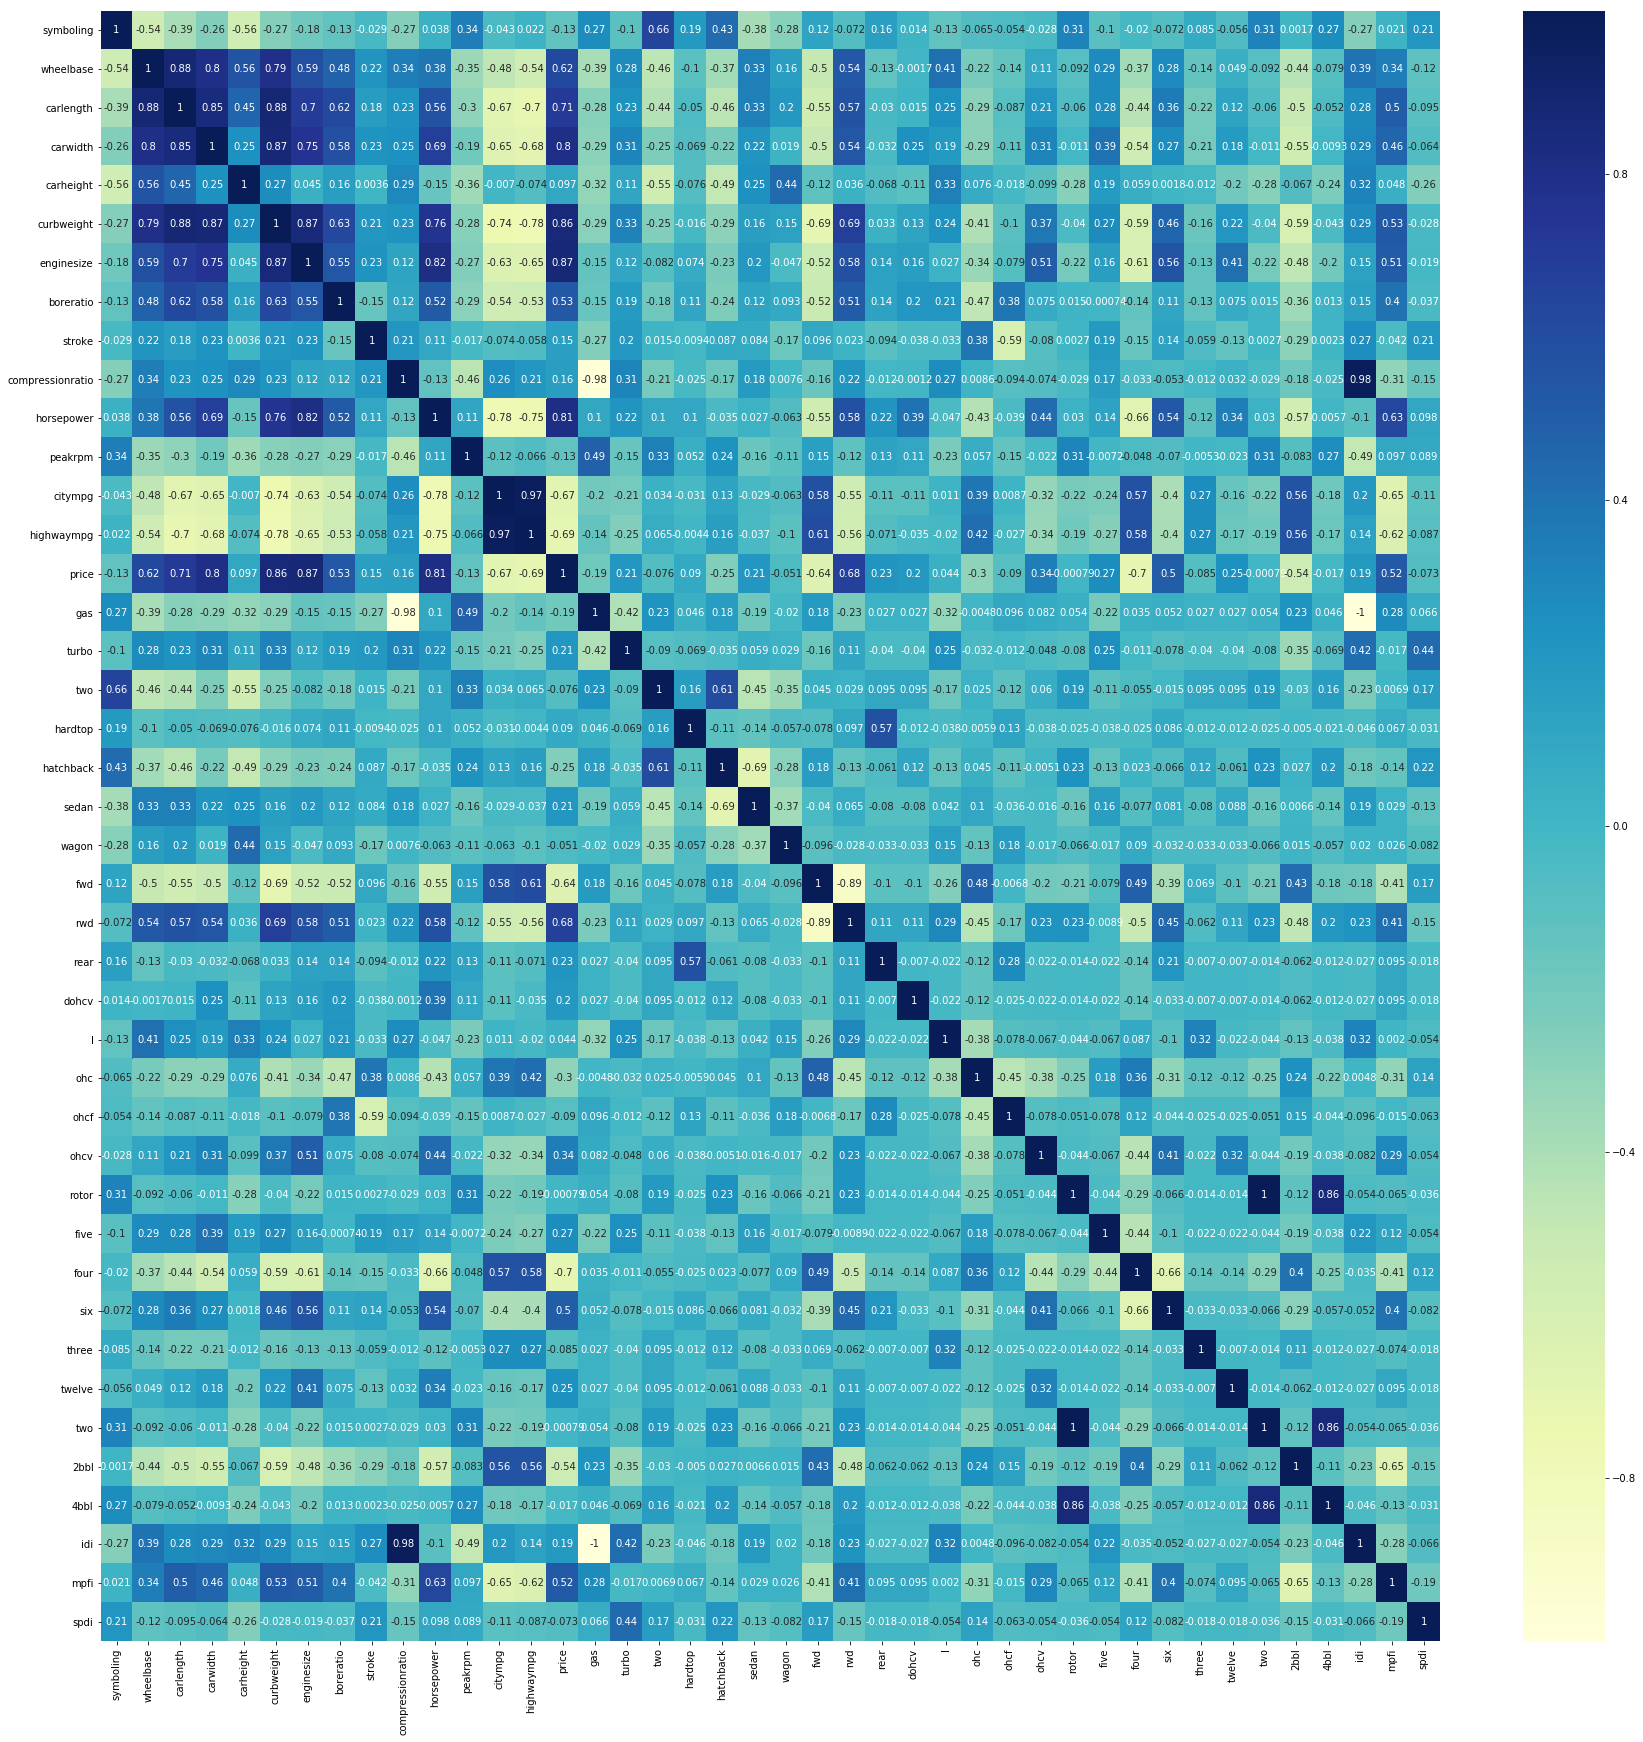

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated
display(df_train.corr())
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**As infered from the above correlation table: Price has high correlation with (enginesize (0.867915), curbweight (0.86186), horsepower (0.806183), carwidth(0.79938), carlength(0.713749), rwd(0.677169), wheelbase(0.622591), boreratio(0.533591), mpfi(0.519993) and six (0.500613))**

Let's plot the same to see individual pair plot to have better understanding

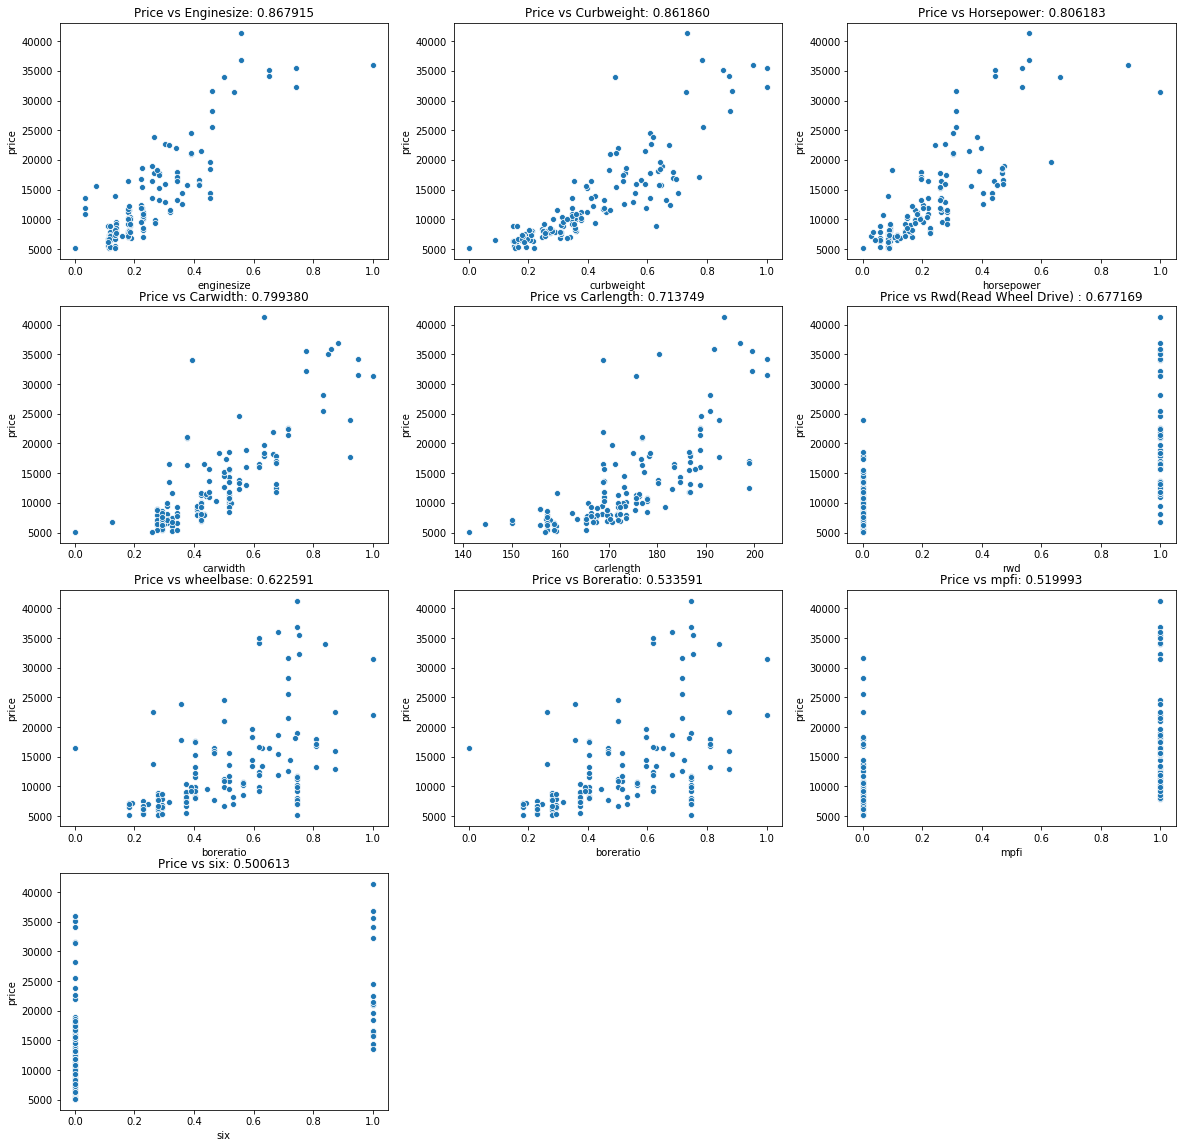

In [38]:
#Plotting correlated variable to see the distribution
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
plt.title("Price vs Enginesize: 0.867915")
sns.scatterplot(df_train.enginesize, df_train.price)
plt.subplot(4,3,2)
plt.title("Price vs Curbweight: 0.861860")
sns.scatterplot(df_train.curbweight, df_train.price)
plt.subplot(4,3,3)
plt.title("Price vs Horsepower: 0.806183")
sns.scatterplot(df_train.horsepower, df_train.price)
plt.subplot(4,3,4)
plt.title("Price vs Carwidth: 0.799380")
sns.scatterplot(df_train.carwidth, df_train.price)
plt.subplot(4,3,5)
plt.title("Price vs Carlength: 0.713749")
sns.scatterplot(df_train.carlength, df_train.price)
plt.subplot(4,3,6)
plt.title("Price vs Rwd(Read Wheel Drive) : 0.677169")
sns.scatterplot(df_train.rwd, df_train.price)
plt.subplot(4,3,7)
plt.title("Price vs wheelbase: 0.622591")
sns.scatterplot(df_train.boreratio, df_train.price)
plt.subplot(4,3,8)
plt.title("Price vs Boreratio: 0.533591")
sns.scatterplot(df_train.boreratio, df_train.price)
plt.subplot(4,3,9)
plt.title("Price vs mpfi: 0.519993")
sns.scatterplot(df_train.mpfi, df_train.price)
plt.subplot(4,3,10)
plt.title("Price vs six: 0.500613")
sns.scatterplot(df_train.six, df_train.price)
plt.show()

#### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('price')
X_train = df_train

## 5. Linear Regression Model Creation

In [40]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Check the parameters obtained

lr.params

const          2479.658045
enginesize    43822.834040
dtype: float64

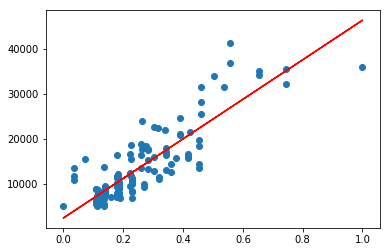

In [42]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 2479.658045 + 43822.834040*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [43]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.09e-44
Time:                        20:03:30   Log-Likelihood:                -1384.0
No. Observations:                 143   AIC:                             2772.
Df Residuals:                     141   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2479.6580    604.784      4.100      0.0

In [44]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight','horsepower','carwidth','carlength','rwd','wheelbase','boreratio','mpfi','six']]

In [45]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          6701.040212
enginesize    18413.739576
curbweight     5888.498125
horsepower     6977.164291
carwidth      11812.291516
carlength       -43.021633
rwd            2977.839967
wheelbase      -711.907655
boreratio     -1836.251100
mpfi             84.201449
six             448.848859
dtype: float64

In [46]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     72.10
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.55e-48
Time:                        20:03:31   Log-Likelihood:                -1350.7
No. Observations:                 143   AIC:                             2723.
Df Residuals:                     132   BIC:                             2756.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6701.0402   9378.468      0.715      0.4

##### Checking for Multicollinearity 

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,rotor,inf
35,two,inf
14,gas,3470.230000
38,idi,647.950000
9,compressionratio,200.930000
6,enginesize,110.450000
31,four,106.830000
5,curbweight,44.050000
13,highwaympg,43.790000
12,citympg,42.130000


In [54]:
# Dropping highly all the values with VIF > 10.

drop_col_mod = ['rotor','two','gas','idi','compressionratio','enginesize','four','curbweight','highwaympg','citympg','horsepower','sedan','six','five','hatchback','carlength','wheelbase','boreratio','carwidth','wagon','rwd','mpfi']
X = X_train.drop(drop_col_mod, 1,)

In [55]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [56]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     13.95
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           6.38e-22
Time:                        20:08:28   Log-Likelihood:                -1404.9
No. Observations:                 143   AIC:                             2848.
Df Residuals:                     124   BIC:                             2904.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.403e+04   4119.462      3.407      0.0

In [57]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,14.03
10,ohc,12.60
1,carheight,9.68
0,symboling,7.81
3,peakrpm,6.28
6,fwd,4.69
15,2bbl,2.47
9,l,2.46
11,ohcf,2.37
4,turbo,2.06


In [64]:
# Dropping highly correlated variables and insignificant variables

drop_col_mod = ['rotor','two','gas','idi','compressionratio','enginesize','four','curbweight','highwaympg','citympg','horsepower','sedan','six','five','hatchback','carlength','wheelbase','boreratio','carwidth','wagon','rwd','mpfi','stroke','ohc']
X = X_train.drop(drop_col_mod, 1,)

In [65]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     14.85
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           6.50e-22
Time:                        20:36:09   Log-Likelihood:                -1408.3
No. Observations:                 143   AIC:                             2851.
Df Residuals:                     126   BIC:                             2901.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.96e+04   2668.521      7.347      0.0

In [67]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,symboling,6.30
2,peakrpm,6.13
1,carheight,4.50
5,fwd,3.94
13,2bbl,2.23
3,turbo,1.93
6,rear,1.68
15,spdi,1.65
8,l,1.61
4,hardtop,1.58


In [68]:
# Dropping highly correlated variables and insignificant variables

drop_col_mod = ['rotor','two','gas','idi','compressionratio','enginesize','four','curbweight','highwaympg','citympg','horsepower','sedan','six','five','hatchback','carlength','wheelbase','boreratio','carwidth','wagon','rwd','mpfi','stroke','ohc','symboling','peakrpm']
X = X_train.drop(drop_col_mod, 1,)

In [69]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     16.45
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.37e-22
Time:                        20:52:07   Log-Likelihood:                -1410.5
No. Observations:                 143   AIC:                             2851.
Df Residuals:                     128   BIC:                             2895.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.692e+04   1543.392     10.961      0.0

In [70]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carheight,3.27
3,fwd,3.19
11,2bbl,2.19
1,turbo,1.93
4,rear,1.62
6,l,1.58
13,spdi,1.58
2,hardtop,1.52
7,ohcf,1.24
8,ohcv,1.22


In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

#### Adding all the varibles

In [ ]:
CarPrice_data.columns

In [ ]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

In [ ]:
print(lr_1.summary())

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif